In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [8]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [9]:
df.head()

df.describe()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
print(df.isnull().sum())


df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [11]:
X = df.drop("target",axis=1)

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pre = model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)

print("MSE:", mse)
print("R2 score:", r2)


MSE: 0.555891598695244
R2 score: 0.5757877060324511


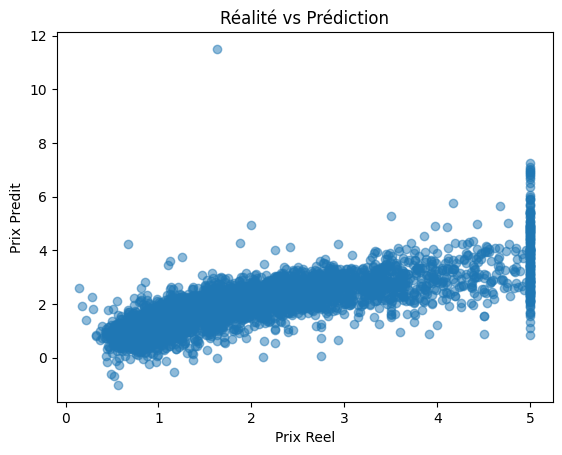

In [15]:
plt.scatter(y_test, y_pre, alpha=0.5)
plt.xlabel("Prix Reel")
plt.ylabel("Prix Predit")
plt.title("Réalité vs Prédiction")
plt.show()


In [16]:
with open(r"C:\Users\P15\Desktop\price_house_prediction\model\model.pkl","wb") as f:
    pickle.dump(model, f)

In [18]:
with open(r"C:\Users\P15\Desktop\price_house_prediction\model\names_features.pkl", "wb") as f:
    pickle.dump(data.feature_names, f)